In [1]:
%autosave 20
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Autosaving every 20 seconds


In [2]:
df=pd.read_csv("training_data.csv")
print("sample before ",df.shape)

sample before  (377203, 6)


In [3]:
def plot_cloumns_individual(columnName,type="bar"):
    x=1
    for i in columnName:
        fig.add_subplot(1,3,x)
        df[i].value_counts().plot(kind=type)
        plt.title(i)
        plt.xticks(rotation=45)
        x=x+1

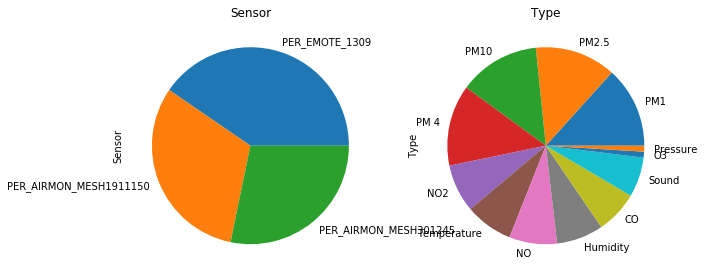

In [4]:
fig = plt.figure(figsize=(15,8))
plot_cloumns_individual(["Sensor","Type"],"pie")
plt.show()

In [5]:
def combinedPlot(c1,c2,c3,position):
    fig, ax = plt.subplots(figsize=(12,6))
    df.groupby([c1,c2])[c3].count().unstack().plot(ax=ax,kind="bar",stacked=True)
    ax.legend(loc=position,ncol=2, fancybox=True, shadow=True)
    plt.xticks(rotation=0)
    plt.xlabel(c1)
    plt.ylabel("Count")
    plt.title(c1+" Vs "+c2)
    plt.show()

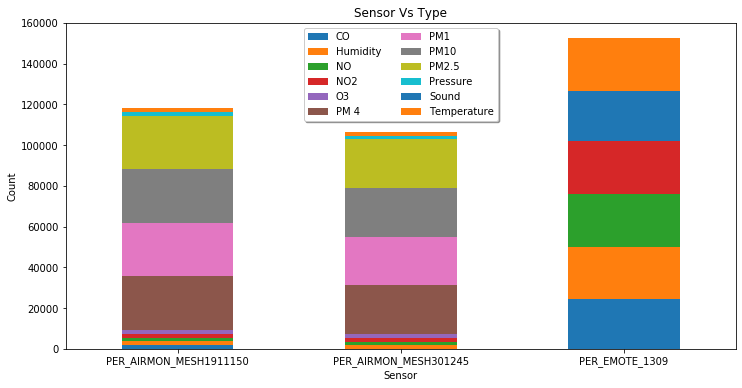

In [6]:
combinedPlot("Sensor","Type","Units","upper center")

In [7]:
df_false=df[df["Flag"]==1]
len(df_false[df_false["Type"]=="NO"])
len(df_false[df_false["Type"]=="NO2"])

def falseValues(c1,c2,c3,position):
    fig, ax = plt.subplots(figsize=(6,4))
    df_false.groupby([c1,c2])[c3].count().unstack().plot(ax=ax,kind="bar",stacked=True)
    ax.legend(loc=position,ncol=1, fancybox=True, shadow=True)
    plt.xticks(rotation=0)
    plt.xlabel(c1)
    plt.ylabel("Count")
    plt.title(c1+" Vs "+c2)
    plt.show()

df_false.groupby(["Type","Sensor"])["Sensor"].count()

1883

125

Type  Sensor                
NO    PER_AIRMON_MESH1911150    1730
      PER_AIRMON_MESH301245      153
NO2   PER_AIRMON_MESH301245        1
      PER_EMOTE_1309             124
Name: Sensor, dtype: int64

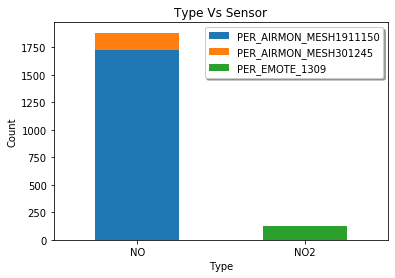

In [8]:
falseValues("Type","Sensor","Sensor","upper right")

In [9]:
df["time"]=pd.to_datetime(df["time"],infer_datetime_format=True,dayfirst=True)
df["Date"]=[d.date() for d in df["time"]]
df["Date"]=pd.to_datetime(df["Date"],format="%Y/%m/%d")

df["Time"]=[d.time() for d in df["time"]]
df["Date1"]=[d.date() for d in df["time"]]
df['Hour']=df['time'].dt.hour

In [10]:
def combinedPlot(c1,c2,position):
    fig, ax = plt.subplots(figsize=(10,5))
    df.groupby([c1,c2])[c1].count().unstack().plot(ax=ax,kind="bar",stacked=True)
    ax.legend(loc=position,ncol=2, fancybox=True, shadow=True)
    plt.xticks(rotation=80)
    plt.xlabel("Date")
    plt.ylabel("count")
    plt.title(c2+" readings on the specific "+c1)
    plt.show()

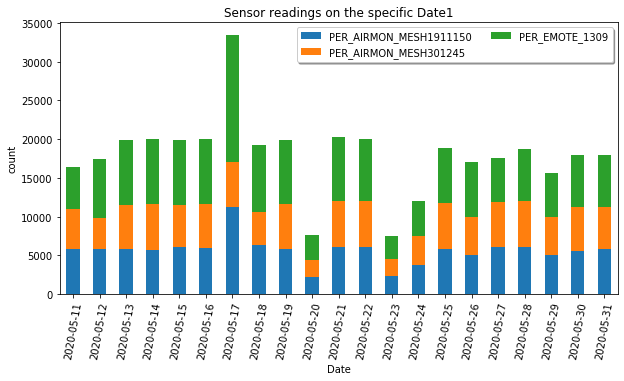

In [11]:
combinedPlot("Date1","Sensor","upper right")